# Exercise 15

# Fraud Detection

## Introduction

- Fraud Detection Dataset from Microsoft Azure: [data](http://gallery.cortanaintelligence.com/Experiment/8e9fe4e03b8b4c65b9ca947c72b8e463)

Fraud detection is one of the earliest industrial applications of data mining and machine learning. Fraud detection is typically handled as a binary classification problem, but the class population is unbalanced because instances of fraud are usually very rare compared to the overall volume of transactions. Moreover, when fraudulent transactions are discovered, the business typically takes measures to block the accounts from transacting to prevent further losses. 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics


In [2]:
import pandas as pd

url = 'https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/datasets/15_fraud_detection.csv.zip'
df = pd.read_csv(url, index_col=0)
df.head()

,accountAge,digitalItemCount,sumPurchaseCount1Day,sumPurchaseAmount1Day,sumPurchaseAmount30Day,paymentBillingPostalCode - LogOddsForClass_0,accountPostalCode - LogOddsForClass_0,paymentBillingState - LogOddsForClass_0,accountState - LogOddsForClass_0,paymentInstrumentAgeInAccount,ipState - LogOddsForClass_0,transactionAmount,transactionAmountUSD,ipPostalCode - LogOddsForClass_0,localHour - LogOddsForClass_0,Label
0,2000,0,0,0.00,720.25,5.064533,0.421214,1.312186,0.566395,3279.574306,1.218157,599.00,626.164650,1.259543,4.745402,0
1,62,1,1,1185.44,2530.37,0.538996,0.481838,4.401370,4.500157,61.970139,4.035601,1185.44,1185.440000,3.981118,4.921349,0
2,2000,0,0,0.00,0.00,5.064533,5.096396,3.056357,3.155226,0.000000,3.314186,32.09,32.090000,5.008490,4.742303,0
3,1,1,0,0.00,0.00,5.064533,5.096396,3.331154,3.331239,0.000000,3.529398,133.28,132.729554,1.324925,4.745402,0
4,1,1,0,0.00,132.73,5.412885,0.342945,5.563677,4.086965,0.001389,3.529398,543.66,543.660000,2.693451,4.876771,0


In [3]:
df.shape, df.Label.sum(), df.Label.mean()

((138721, 16), 797, 0.0057453449730033666)

# Exercise 15.1

Estimate a Logistic Regression and a Decision Tree

Evaluate using the following metrics:
* Accuracy
* F1-Score
* F_Beta-Score (Beta=10)

Comment about the results

**Se desea primero revisar el rango de valores que se encuentra cada una de las variables e identificar de qué tipo es cada columna**

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138721 entries, 0 to 138720
Data columns (total 16 columns):
accountAge                                      138721 non-null int64
digitalItemCount                                138721 non-null int64
sumPurchaseCount1Day                            138721 non-null int64
sumPurchaseAmount1Day                           138721 non-null float64
sumPurchaseAmount30Day                          138721 non-null float64
paymentBillingPostalCode - LogOddsForClass_0    138721 non-null float64
accountPostalCode - LogOddsForClass_0           138721 non-null float64
paymentBillingState - LogOddsForClass_0         138721 non-null float64
accountState - LogOddsForClass_0                138721 non-null float64
paymentInstrumentAgeInAccount                   138721 non-null float64
ipState - LogOddsForClass_0                     138721 non-null float64
transactionAmount                               138721 non-null float64
transactionAmountUSD           

In [5]:
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure()
    fig.set_figheight(25)
    fig.set_figwidth(25)
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(ax=ax)
        ax.set_title(var_name)
    plt.show()


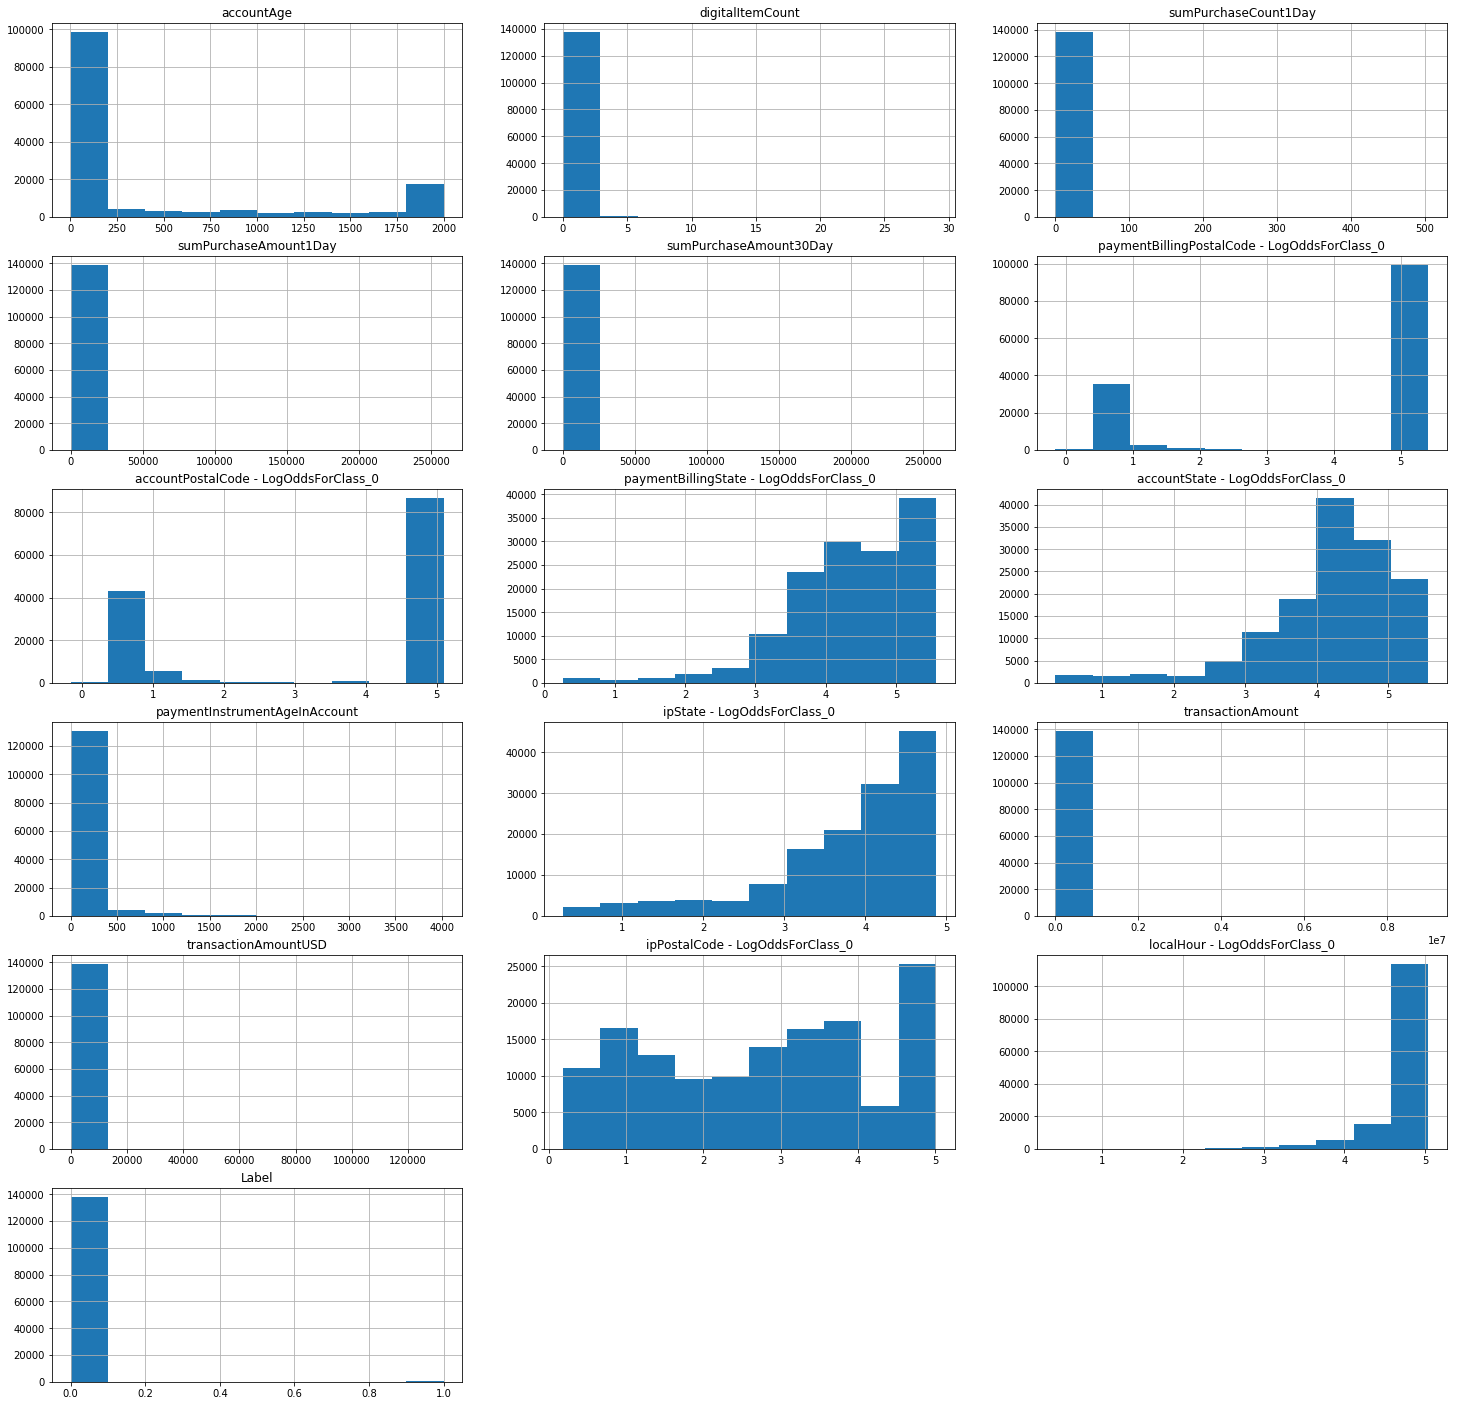

In [6]:
draw_histograms(df, df.columns, 6, 3)

**La columna 'Label' está de tipo entero, luego debo crear una nueva columna que sea de tipo boolean.Para la regresión logística se van a estandarizar todas las variables y no se va a tener en cuenta la variable 'transactionAmount' sino la que me informa que el valor de transacción está en dólares**

In [7]:
df['Fraud']=df['Label']==1
df.head()

,accountAge,digitalItemCount,sumPurchaseCount1Day,sumPurchaseAmount1Day,sumPurchaseAmount30Day,paymentBillingPostalCode - LogOddsForClass_0,accountPostalCode - LogOddsForClass_0,paymentBillingState - LogOddsForClass_0,accountState - LogOddsForClass_0,paymentInstrumentAgeInAccount,ipState - LogOddsForClass_0,transactionAmount,transactionAmountUSD,ipPostalCode - LogOddsForClass_0,localHour - LogOddsForClass_0,Label,Fraud
0,2000,0,0,0.00,720.25,5.064533,0.421214,1.312186,0.566395,3279.574306,1.218157,599.00,626.164650,1.259543,4.745402,0,False
1,62,1,1,1185.44,2530.37,0.538996,0.481838,4.401370,4.500157,61.970139,4.035601,1185.44,1185.440000,3.981118,4.921349,0,False
2,2000,0,0,0.00,0.00,5.064533,5.096396,3.056357,3.155226,0.000000,3.314186,32.09,32.090000,5.008490,4.742303,0,False
3,1,1,0,0.00,0.00,5.064533,5.096396,3.331154,3.331239,0.000000,3.529398,133.28,132.729554,1.324925,4.745402,0,False
4,1,1,0,0.00,132.73,5.412885,0.342945,5.563677,4.086965,0.001389,3.529398,543.66,543.660000,2.693451,4.876771,0,False


In [8]:
y = df['Fraud'].values 
X= df.drop(['Fraud','transactionAmount','Label'], axis=1)

**Revisemos como se distribuye la variable respuesta**

In [9]:
print('La cantidad de transacciones con fraude',(y == 1).sum(),', y de transacciones no fraude',(y == 0).sum())

La cantidad de transacciones con fraude 797 , y de transacciones no fraude 137924


**La cantidad de transacciones con fraude no alcanza a ser ni el 1% (0,57%) de los registros de la base**

*Regresión Logística*

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
## Estandarizamos los valores de las variables continuas
scaler  =  StandardScaler ()

X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform (X_test)

C:\Users\rodri\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\rodri\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\rodri\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


In [12]:
logreg = LogisticRegression(solver='liblinear',C=1e9,random_state=42)
logreg.fit(X_train_s, y_train)  

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [13]:
y_pred_log = logreg.predict(X_test_s) 

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score

Acc_log1=accuracy_score(y_test, y_pred_log)
f1s_log1=f1_score(y_test,y_pred_log,average='binary')
fbs_log1=fbeta_score(y_test,y_pred_log,average='binary', beta = 10 )

print(Acc_log1, f1s_log1,fbs_log1)


0.994112982675349 0.0 0.0


C:\Users\rodri\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


*Árbol de decisión*

In [15]:
treecl = DecisionTreeClassifier(max_depth=6,max_leaf_nodes=10,random_state=1)
treecl.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [16]:
y_pred_tree = treecl.predict(X_test)
print('En la base de test--> Positivos predichos',(y_pred_tree==1).sum(),', de todos los positivos reales:',(y_test==1).sum())

En la base de test--> Positivos predichos 7 , de todos los positivos reales: 245


In [17]:
Acc_tree1=accuracy_score(y_test, y_pred_tree)
f1s_tree1=f1_score(y_test,y_pred_tree,average='binary')
fbs_tree1=fbeta_score(y_test,y_pred_tree,average='binary', beta = 10 )

print(Acc_tree1, f1s_tree1,fbs_tree1)

0.9940889540332076 0.023809523809523808 0.01236381442036969


**Consistentemente como la base está tan desbalanceada donde entreno el modelo con 99.5% de una clase 
y 0.5% de otra, entonces por eso el puntaje de clasificación da tan alto, y se evidencia
en el puntaje F1, que es la ponderación sobre la precisión 0.99 y los positivos predichos sobre los
los positivos reales, da un numero tan reducido y de tal manera podemos concluir que no es correcto y se
debe dar un balanceo a los datos**


# Exercise 15.2

Under-sample the negative class using random-under-sampling

Which is parameter for target_percentage did you choose?
How the results change?

**Only apply under-sampling to the training set, evaluate using the whole test set**

*Se emplea la función vista en el notebook de clase N° 15*

In [18]:
def UnderSampling(X, y, target_percentage=0.5, seed=None):
    # Assuming minority class is the positive
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()

    n_samples_0_new =  n_samples_1 / target_percentage - n_samples_1
    n_samples_0_new_per = n_samples_0_new / n_samples_0

    filter_ = y == 0

    np.random.seed(seed)
    rand_1 = np.random.binomial(n=1, p=n_samples_0_new_per, size=n_samples)
    
    filter_ = filter_ & rand_1
    filter_ = filter_ | (y == 1)
    filter_ = filter_.astype(bool)
    
    return X[filter_], y[filter_]

**Se va a usar en la base de entrenamiento, donde se va a reducir los registros con no fraude y se va a probar con diferente porcentaje para mejorar la clasificación.**

In [19]:
print('La cantidad de transacciones con fraude en la base de entrenamiento',(y_train == 1).sum(),', y de transacciones no fraude',(y_train == 0).sum())

La cantidad de transacciones con fraude en la base de entrenamiento 552 , y de transacciones no fraude 96552


*Regresion Logística*

In [20]:
for target_percentage in [0.1,0.15, 0.2, 0.3, 0.4, 0.5]:
    X_porct, y_porct = UnderSampling(X_train_s, y_train, target_percentage, 1)
    print('En la base de train--> Fraude',(y_porct==1).sum(),', No Fraude:',(y_porct==0).sum())
    logreg.fit(X_porct, y_porct)
    y_pred_log = logreg.predict(X_test_s)
    Acc_log2=accuracy_score(y_test, y_pred_log)
    f1s_log2=f1_score(y_test,y_pred_log,average='binary')
    fbs_log2=fbeta_score(y_test,y_pred_log,average='binary', beta = 10 )
    print('Para un porcentaje de:',target_percentage,' tenemos-->',Acc_log2, f1s_log2,fbs_log2,'\n')

En la base de train--> Fraude 552 , No Fraude: 4958
Para un porcentaje de: 0.1  tenemos--> 0.9907730014176899 0.04000000000000001 0.03277225714865139 

En la base de train--> Fraude 552 , No Fraude: 3101
Para un porcentaje de: 0.15  tenemos--> 0.9834923228488358 0.05241379310344827 0.07682145716573259 

En la base de train--> Fraude 552 , No Fraude: 2209
Para un porcentaje de: 0.2  tenemos--> 0.9727995770958983 0.05351170568561872 0.12698911634120466 

En la base de train--> Fraude 552 , No Fraude: 1247
Para un porcentaje de: 0.3  tenemos--> 0.9377658168536896 0.04498525073746313 0.22846441947565543 

En la base de train--> Fraude 552 , No Fraude: 787
Para un porcentaje de: 0.4  tenemos--> 0.8462166902948315 0.030303030303030304 0.32733754658888353 

En la base de train--> Fraude 552 , No Fraude: 528
Para un porcentaje de: 0.5  tenemos--> 0.6266429584064205 0.021659740586827854 0.43281759972095574 



*Árbol de clasificación*

In [22]:
for target_percentage in [0.1,0.15, 0.2, 0.3, 0.4, 0.5]:
    X_porct, y_porct = UnderSampling(X_train, y_train, target_percentage, 1)
    print('En la base de train--> Fraude',(y_porct==1).sum(),', No Fraude:',(y_porct==0).sum())
    treecl.fit(X_porct, y_porct)
    y_pred_tree = treecl.predict(X_test)
    Acc_tree2=accuracy_score(y_test, y_pred_tree)
    f1s_tree2=f1_score(y_test,y_pred_tree,average='binary')
    fbs_tree2=fbeta_score(y_test,y_pred_tree,average='binary', beta = 10 )
    print('Para un porcentaje de:',target_percentage,' tenemos-->',Acc_tree2, f1s_tree2,fbs_tree2,'\n')
    

En la base de train--> Fraude 552 , No Fraude: 4958
Para un porcentaje de: 0.1  tenemos--> 0.9842131821130788 0.12516644474034622 0.1898344397344637 

En la base de train--> Fraude 552 , No Fraude: 3101
Para un porcentaje de: 0.15  tenemos--> 0.9877934497921522 0.13013698630136986 0.15451507709650147 

En la base de train--> Fraude 552 , No Fraude: 2209
Para un porcentaje de: 0.2  tenemos--> 0.9649181824735085 0.08521303258145363 0.26567637615566125 

En la base de train--> Fraude 552 , No Fraude: 1247
Para un porcentaje de: 0.3  tenemos--> 0.8967729533604056 0.04829419583517944 0.3826688449372589 

En la base de train--> Fraude 552 , No Fraude: 787
Para un porcentaje de: 0.4  tenemos--> 0.8035658504937886 0.03562581101804884 0.4659354759868019 

En la base de train--> Fraude 552 , No Fraude: 528
Para un porcentaje de: 0.5  tenemos--> 0.7938342504265083 0.03508771929824561 0.4753371345823151 



**Tanto para la regresión logistica cómo para el árbol de clasificación, el porcentaje que maximiza los puntajes de precisión en la clasificación y el ponderado entre el total de precisión y los verdaderos predichos, para este caso es 15%: En la base de train--> Fraude 552 , No Fraude 3101**

Sigue clasificando mejor el árbol respecto a la regresión!

# Exercise 15.3

Same analysis using random-over-sampling

In [23]:
def OverSampling(X, y, target_percentage=0.5, seed=None):
    # Assuming minority class is the positive
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()

    n_samples_1_new =  -target_percentage * n_samples_0 / (target_percentage- 1)

    np.random.seed(seed)
    filter_ = np.random.choice(X[y == 1].shape[0], int(n_samples_1_new))
    # filter_ is within the positives, change to be of all
    filter_ = np.nonzero(y == 1)[0][filter_]
    
    filter_ = np.concatenate((filter_, np.nonzero(y == 0)[0]), axis=0)
    
    return X[filter_], y[filter_]

*Regresión Logística*

In [25]:
for target_percentage in [0.1,0.15, 0.2, 0.3, 0.4, 0.5]:
    X_porct, y_porct = OverSampling(X_train_s, y_train, target_percentage, 1)
    print('En la base de train--> Fraude',(y_porct==1).sum(),', No Fraude:',(y_porct==0).sum())
    logreg.fit(X_porct, y_porct)
    y_pred_log = logreg.predict(X_test_s)
    Acc_log3=accuracy_score(y_test, y_pred_log)
    f1s_log3=f1_score(y_test,y_pred_log,average='binary')
    fbs_log3=fbeta_score(y_test,y_pred_log,average='binary', beta = 10 )
    print('Para un porcentaje de:',target_percentage,' tenemos-->',Acc_log3, f1s_log3,fbs_log3,'\n')

En la base de train--> Fraude 10728 , No Fraude: 96552
Para un porcentaje de: 0.1  tenemos--> 0.9925270922940145 0.025078369905956115 0.01644013998535037 

En la base de train--> Fraude 17038 , No Fraude: 96552
Para un porcentaje de: 0.15  tenemos--> 0.9874330201600308 0.06104129263913824 0.06920038690955989 

En la base de train--> Fraude 24138 , No Fraude: 96552
Para un porcentaje de: 0.2  tenemos--> 0.9788547949155393 0.06581740976645437 0.1242608247013533 

En la base de train--> Fraude 41379 , No Fraude: 96552
Para un porcentaje de: 0.3  tenemos--> 0.9449744094961193 0.04583333333333333 0.20840367660851625 

En la base de train--> Fraude 64368 , No Fraude: 96552
Para un porcentaje de: 0.4  tenemos--> 0.8671456376000192 0.03491010647582475 0.33684631803628606 

En la base de train--> Fraude 96552 , No Fraude: 96552
Para un porcentaje de: 0.5  tenemos--> 0.6079727034625273 0.02076706080067223 0.4270456545116824 



*Árbol de clasificación*

In [26]:
for target_percentage in [0.1,0.15, 0.2, 0.3, 0.4, 0.5]:
    X_porct, y_porct = OverSampling(X_train_s, y_train, target_percentage, 1)
    print('En la base de train--> Fraude',(y_porct==1).sum(),', No Fraude:',(y_porct==0).sum())
    treecl.fit(X_porct, y_porct)
    y_pred_tree = treecl.predict(X_test_s)
    Acc_tree3=accuracy_score(y_test, y_pred_tree)
    f1s_tree3=f1_score(y_test,y_pred_tree,average='binary')
    fbs_tree3=fbeta_score(y_test,y_pred_tree,average='binary', beta = 10 )
    print('Para un porcentaje de:',target_percentage,' tenemos-->',Acc_tree3, f1s_tree3,fbs_tree3,'\n')
    

En la base de train--> Fraude 10728 , No Fraude: 96552
Para un porcentaje de: 0.1  tenemos--> 0.9787586803469736 0.11952191235059763 0.23991448592580863 

En la base de train--> Fraude 17038 , No Fraude: 96552
Para un porcentaje de: 0.15  tenemos--> 0.9694115385539563 0.10415200562983815 0.2910889546658358 

En la base de train--> Fraude 24138 , No Fraude: 96552
Para un porcentaje de: 0.2  tenemos--> 0.985390585578009 0.12138728323699421 0.17004048582995956 

En la base de train--> Fraude 41379 , No Fraude: 96552
Para un porcentaje de: 0.3  tenemos--> 0.9382704183386597 0.06615776081424937 0.34033177812337995 

En la base de train--> Fraude 64368 , No Fraude: 96552
Para un porcentaje de: 0.4  tenemos--> 0.830309729197203 0.038922155688622756 0.4570135746606335 

En la base de train--> Fraude 96552 , No Fraude: 96552
Para un porcentaje de: 0.5  tenemos--> 0.8165413172501622 0.03756460355477121 0.4675344849012054 



**En esta ocasión el porcentaje que maximiza los puntajes de precisión en la clasificación y el ponderado entre el total de precisión y los verdaderos predichos, es 20%: En la base de train--> Fraude 24138 , No Fraude: 96552**

Sin embargo el puntaje F1 score no es cercano a 1 por lo que aún hay oportunidad de mejora en la clasificación del modelo.

# Exercise 15.4 (3 points)

Evaluate the results using SMOTE

Which parameters did you choose?

In [27]:
from imblearn.over_sampling import SMOTE

*Regresión logística con uso de Smote para balanceo de datos donde se juega con el número de vecinos cercanos para crear la observación desde 5 a 10 vecinos, y un pocentaje de balanceo de la clase minoritaria respecto a la mayoritaria desde 10% hasta 50% para identificar qué parámetros soportan mejor pedicción y clasificación ponderada.*

In [28]:


for k in [5,6, 7, 8, 9, 10]:
    print('\n Para ',k,' vecinos:')
    for target_percentage in [0.1,0.15, 0.2, 0.3, 0.4, 0.5]:
        smt = SMOTE(target_percentage,random_state=1, k_neighbors = k)
        X_porct, y_porct = smt.fit_resample(X_train_s, y_train)
        print('En la base de train--> Fraude',(y_porct==1).sum(),', No Fraude:',(y_porct==0).sum())
        logreg.fit(X_porct, y_porct)
        y_pred_log = logreg.predict(X_test_s)
        Acc_log4=accuracy_score(y_test, y_pred_log)
        f1s_log4=f1_score(y_test,y_pred_log,average='binary')
        fbs_log4=fbeta_score(y_test,y_pred_log,average='binary', beta = 10 )
        print('Para un porcentaje de:',target_percentage,' tenemos-->',Acc_log4, f1s_log4,fbs_log4)


 Para  5  vecinos:
En la base de train--> Fraude 9655 , No Fraude: 96552
Para un porcentaje de: 0.1  tenemos--> 0.9932960088425403 0.01413427561837456 0.008232129757926481
En la base de train--> Fraude 14482 , No Fraude: 96552
Para un porcentaje de: 0.15  tenemos--> 0.9908450873441141 0.04030226700251889 0.0327762453350641
En la base de train--> Fraude 19310 , No Fraude: 96552
Para un porcentaje de: 0.2  tenemos--> 0.9858951870629791 0.05169628432956381 0.06496743587681918
En la base de train--> Fraude 28965 , No Fraude: 96552
Para un porcentaje de: 0.3  tenemos--> 0.971453973135978 0.06012658227848102 0.15039774285826246
En la base de train--> Fraude 38620 , No Fraude: 96552
Para un porcentaje de: 0.4  tenemos--> 0.9518706297907106 0.05026078710289237 0.2030420270065241
En la base de train--> Fraude 48276 , No Fraude: 96552
Para un porcentaje de: 0.5  tenemos--> 0.9236610039166687 0.041628959276018104 0.2527747551686616

 Para  6  vecinos:
En la base de train--> Fraude 9655 , No Frau

**Los valores de los parámetros que maximiza el puntaje f beta en la regresión logística usando balanceo con Smote son: k=7 y target_percentage= 50% con:**
- Accuracy ---> 0.92
- F1 score --->0.04
- Fbeta Score --->0.25

*Uso de Smote en Árbol de clasificación para balanceo de datos donde se juega con el número de vecinos cercanos para crear la observación desde 5 a 10 vecinos, y un pocentaje de balanceo de la clase minoritaria respecto a la mayoritaria desde 10% hasta 50% para identificar qué parámetros soportan mejor pedicción y clasificación ponderada.*

In [29]:

for k in [5,6, 7, 8, 9, 10]:
    print('\n Para ',k,' vecinos:')
    for target_percentage in [0.1,0.15, 0.2, 0.3, 0.4, 0.5]:
        smt = SMOTE(target_percentage,random_state=1, k_neighbors = k)
        X_porct, y_porct = smt.fit_resample(X_train_s, y_train)
        print('En la base de train--> Fraude',(y_porct==1).sum(),', No Fraude:',(y_porct==0).sum())
        treecl.fit(X_porct, y_porct)
        y_pred_tree = treecl.predict(X_test_s)
        Acc_tree4=accuracy_score(y_test, y_pred_tree)
        f1s_tree4=f1_score(y_test,y_pred_tree,average='binary')
        fbs_tree4=fbeta_score(y_test,y_pred_tree,average='binary', beta = 10)
        print('Para un porcentaje de:',target_percentage,' tenemos-->',Acc_tree4, f1s_tree4,fbs_tree4)


 Para  5  vecinos:
En la base de train--> Fraude 9655 , No Fraude: 96552
Para un porcentaje de: 0.1  tenemos--> 0.9869764759593436 0.11726384364820848 0.14620612006916242
En la base de train--> Fraude 14482 , No Fraude: 96552
Para un porcentaje de: 0.15  tenemos--> 0.9831559218588558 0.11378002528445005 0.1814661023716362
En la base de train--> Fraude 19310 , No Fraude: 96552
Para un porcentaje de: 0.2  tenemos--> 0.9839969243338059 0.11671087533156498 0.1776960294294054
En la base de train--> Fraude 28965 , No Fraude: 96552
Para un porcentaje de: 0.3  tenemos--> 0.9836364947016845 0.11673151750972764 0.1816111244305922
En la base de train--> Fraude 38620 , No Fraude: 96552
Para un porcentaje de: 0.4  tenemos--> 0.9653987553163371 0.061277705345501955 0.18407072782969483
En la base de train--> Fraude 48276 , No Fraude: 96552
Para un porcentaje de: 0.5  tenemos--> 0.9630679770286181 0.07576668671076368 0.24550505440234588

 Para  6  vecinos:
En la base de train--> Fraude 9655 , No Frau

**En el arbol de clasificación, los valores de los parámetros que maximiza el puntaje f beta  usando balanceo con Smote son: k=8 y target_percentage= 50% con:**
- Accuracy ---> 0.86
- F1 score --->0.04
- Fbeta Score --->0.39

# Exercise 15.5 (3 points)

Evaluate the results using Adaptive Synthetic Sampling Approach for Imbalanced
Learning (ADASYN)

http://www.ele.uri.edu/faculty/he/PDFfiles/adasyn.pdf
https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.ADASYN.html#rf9172e970ca5-1

In [30]:
from imblearn.over_sampling import  ADASYN

In [32]:
for n in [5,6, 7, 8, 9, 10]:
    print('\n Para ',n,' vecinos:')
    for target_percentage in [0.1,0.15, 0.2, 0.3, 0.4, 0.5]:
        ada = ADASYN(target_percentage,random_state=1, n_neighbors = n)
        X_porct, y_porct = ada.fit_resample(X_train_s, y_train)
        print('En la base de train--> Fraude',(y_porct==1).sum(),', No Fraude:',(y_porct==0).sum())
        logreg.fit(X_porct, y_porct)
        y_pred_log = logreg.predict(X_test_s)
        Acc_log5=accuracy_score(y_test, y_pred_log)
        f1s_log5=f1_score(y_test,y_pred_log,average='binary')
        fbs_log5=fbeta_score(y_test,y_pred_log,average='binary', beta = 10)
        print('Para un porcentaje de:',target_percentage,' tenemos-->',Acc_log5, f1s_log5,fbs_log5)


 Para  5  vecinos:
En la base de train--> Fraude 9434 , No Fraude: 96552
Para un porcentaje de: 0.1  tenemos--> 0.9935362952639546 0.014652014652014652 0.008235485975212004
En la base de train--> Fraude 14584 , No Fraude: 96552
Para un porcentaje de: 0.15  tenemos--> 0.99110940240767 0.046391752577319596 0.03688674268554965
En la base de train--> Fraude 19334 , No Fraude: 96552
Para un porcentaje de: 0.2  tenemos--> 0.9864959031165149 0.05387205387205387 0.0650327981005272
En la base de train--> Fraude 29218 , No Fraude: 96552
Para un porcentaje de: 0.3  tenemos--> 0.971285772640988 0.053840063341250986 0.13457167489615174
En la base de train--> Fraude 38578 , No Fraude: 96552
Para un porcentaje de: 0.4  tenemos--> 0.9523752312756806 0.04527938342967245 0.1802817971212639
En la base de train--> Fraude 48462 , No Fraude: 96552
Para un porcentaje de: 0.5  tenemos--> 0.9214503688396569 0.03881211408409291 0.24103268730112817

 Para  6  vecinos:
En la base de train--> Fraude 9505 , No Fra

**En la regresión logística, los valores de los parámetros que maximiza el puntaje f1 usando balanceo con Adasyn son: k=9 y target_percentage= 30% con:**
- Accuracy ---> 0.97
- F1 score --->0.057
- Fbeta Score --->0.14

In [34]:
for n in [5,6, 7, 8, 9, 10]:
    print('\n Para ',n,' vecinos:')
    for target_percentage in [0.1,0.15, 0.2, 0.3, 0.4, 0.5]:
        ada = ADASYN(target_percentage,random_state=1, n_neighbors = n)
        X_porct, y_porct = ada.fit_resample(X_train_s, y_train)
        print('En la base de train--> Fraude',(y_porct==1).sum(),', No Fraude:',(y_porct==0).sum())
        treecl.fit(X_porct, y_porct)
        y_pred_tree = treecl.predict(X_test_s)
        Acc_tree5=accuracy_score(y_test, y_pred_tree)
        f1s_tree5=f1_score(y_test,y_pred_tree,average='binary')
        fbs_tree5=fbeta_score(y_test,y_pred_tree,average='binary', beta = 10)
        print('Para un porcentaje de:',target_percentage,' tenemos-->',Acc_tree5, f1s_tree5,fbs_tree5)


 Para  5  vecinos:
En la base de train--> Fraude 9533 , No Fraude: 96552
Para un porcentaje de: 0.1  tenemos--> 0.987505106086455 0.12457912457912458 0.1503883456074691
En la base de train--> Fraude 14351 , No Fraude: 96552
Para un porcentaje de: 0.15  tenemos--> 0.986111444842252 0.12158054711246201 0.1621643318749247
En la base de train--> Fraude 19108 , No Fraude: 96552
Para un porcentaje de: 0.2  tenemos--> 0.9836364947016845 0.11673151750972764 0.1816111244305922
En la base de train--> Fraude 29065 , No Fraude: 96552
Para un porcentaje de: 0.3  tenemos--> 0.9650383256842155 0.07853071564281192 0.24239374467755664
En la base de train--> Fraude 38647 , No Fraude: 96552
Para un porcentaje de: 0.4  tenemos--> 0.9638609222192854 0.07616707616707616 0.24193486071939108
En la base de train--> Fraude 48153 , No Fraude: 96552
Para un porcentaje de: 0.5  tenemos--> 0.9482423048273542 0.056091148115688 0.24358442928741006

 Para  6  vecinos:
En la base de train--> Fraude 9533 , No Fraude: 9

**Aquí es indiferente el número de vecinos a tener en cuenta y los valores de target_percentage que maximiza el puntaje f beta y f1   cojuntamente usando balanceo con Adasyn es  15 ó 20% con:**
- Accuracy ---> 0.98
- F1 score --->0.12
- Fbeta Score --->0.16

# Exercise 15.6 (3 points)

Compare and comment about the results

Conclusiones:
1. En todo el desarrollo del notebook, el árbol de clasificación brindó mejores resultados de predición y clasificación.
2. Cuando se usó undersampling tanto para la regresión como en el árbol de clasificación, la mejor participación dado por el mejor puntaje obtenido de f1 score y fbeta score fue un porcentaje de la clase minoritaria, transacciones fraudulentas en este caso del 15% para la base de entrenamiento.
3. De manera similar, en oversampling lo más conveniente fue el 20%.  
Como nos damos cuenta para este ejercicio, no fue necesario llegar a un balanceo 50%/50% porque se obtuvieron mejores valores de clasificación y predicción con un balanceo menor para las transacciones fraudulentas.
4. Usando la función SMOTE, se realizó el ejercicio con los dos algoritmos y se puede evidenciar que, si queremos seleccionar el mejor modelo dado por el valor de Fbeta score donde destaco con el valor de beta la precisión (no recall) entonces el numero de vecinos que se debe tener en cuenta es entre 7 y 8 y la ponderación de la base minoritaria sí debe ser 50% para la base de entrenamiento.
5. Usando la función ADASYN el número de vecinos parece indiferente, pues no representó cambios en las métricas de evaluación del modelo. Teniendo en cuenta la forma en como trabaja el algortimo donde crea muestras sintéticas que complementa SMOTE con Borderline, requirió tiempo de procesamiento.

Finalmente ante estos escenarios de datos desbalanceados, entre mayor es el porcentaje de la clase minoritaria para hacer el entrenamiento, mayor el fbeta score al evaluar el modelo, lo cual es una buena métrica en casos similares de cancer o enfermedad donde se valora realmente la precisión.

***Por: Ana Milena Rodríguez***